<a href="https://colab.research.google.com/github/anqi-guo/udacity-dsnd-blog-post/blob/main/calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/study/DSND/airbnb'

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv(f'{DATA_PATH}/data/calendar-202112-sh.csv')

In [3]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5661881,2021-12-24,f,$429.00,$429.00,1.0,30.0
1,5661881,2021-12-25,f,$429.00,$429.00,1.0,30.0
2,5661881,2021-12-26,f,$399.00,$399.00,1.0,30.0
3,5661881,2021-12-27,f,$399.00,$399.00,1.0,30.0
4,5661881,2021-12-28,f,$399.00,$399.00,1.0,30.0


In [4]:
df.shape

(10645228, 7)

In [5]:
df['listing_id'].nunique()

29165

In [7]:
df.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].apply(lambda x: float(x[1:].replace(',','')) if type(x)==str else x)
df['adjusted_price'] = df['adjusted_price'].apply(lambda x: float(x[1:].replace(',','')) if type(x)==str else x)
df.sort_values(by=['listing_id', 'date'], inplace=True)

# Price Change

In [23]:
import random
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

def draw_price_change(listing_id):
  print(f'Listing id: {listing_id}')
  data = df.query(f'listing_id == {listing_id}')
  fig, ax = plt.subplots(figsize = (30, 5))
  sns.lineplot(data=data, x='date', y='price');

  # specify the position of the major ticks at the beginning of the week
  ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1));
  # specify the format of the labels as 'year-month-day'
  ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d'));
  # (optional) rotate by 90° the labels in order to improve their spacing
  plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45);

Listing id: 24234215


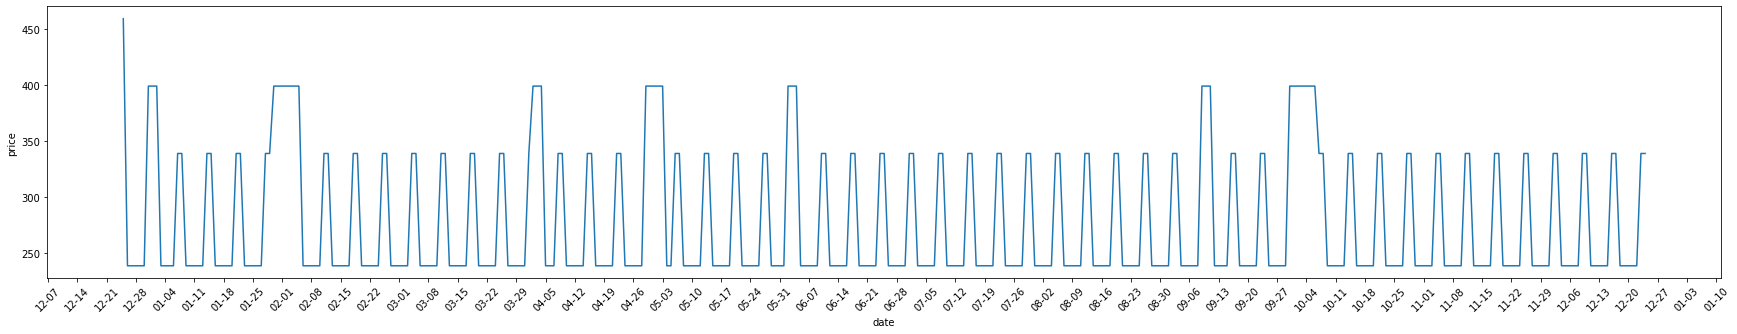

In [24]:
listing_id = random.choice(df['listing_id'].unique())
draw_price_change(listing_id)

The price of this listing has strong seasonality. The price rises to 400 yuan during holidays(new year, chinese new year, labors day, etc), and the price is slightly higher during weekends (350) than weekdays (250).

Listing id: 45299567


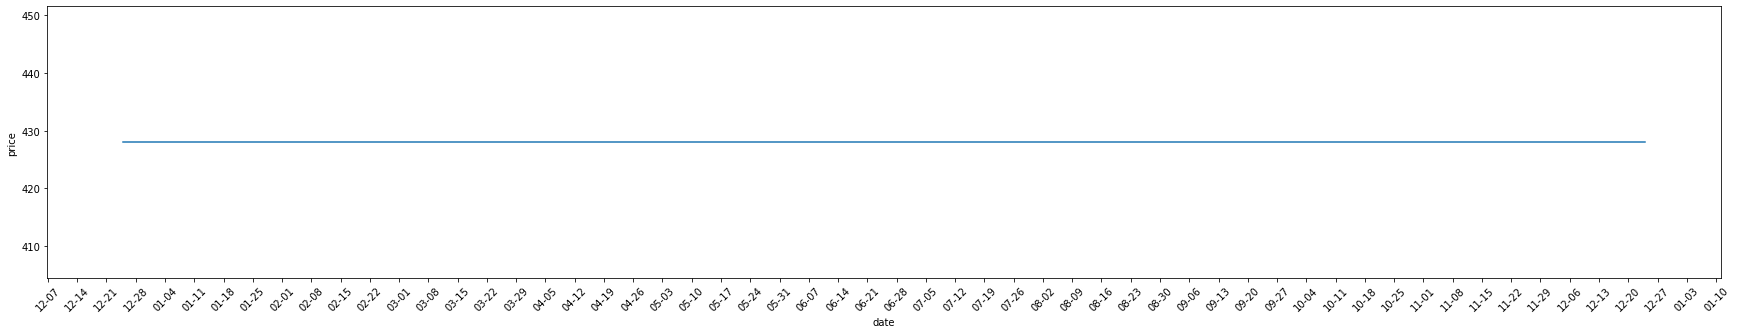

In [27]:
listing_id = random.choice(df['listing_id'].unique())
draw_price_change(listing_id)

This listing has no seasonality

Listing id: 47978806


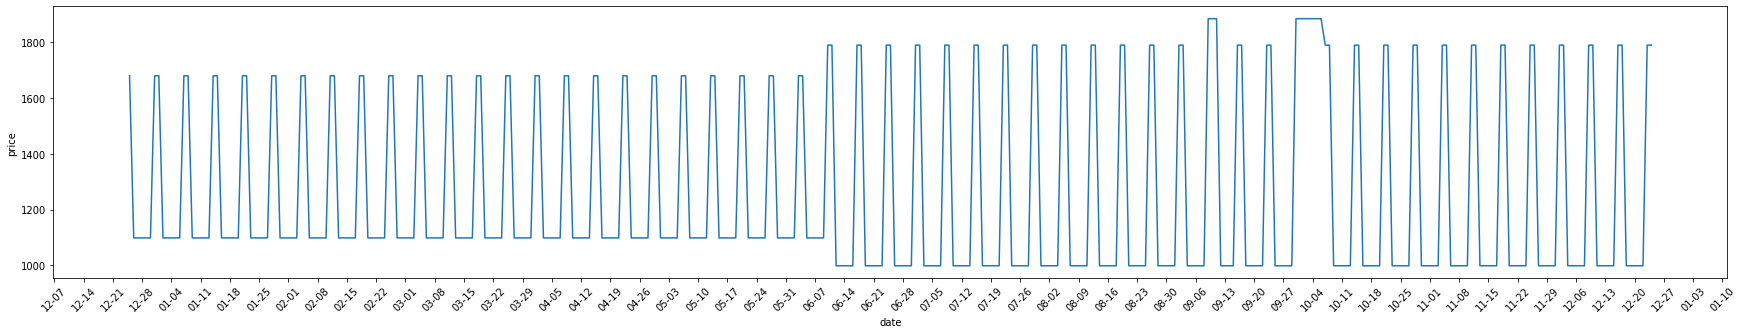

In [30]:
listing_id = random.choice(df['listing_id'].unique())
draw_price_change(listing_id)